In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import gc

warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")

In [3]:
df = pd.read_csv('titanic_cleaned.csv')
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [4]:
from scipy.stats import chi2_contingency

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


Chi2: 102.88898875696056, p-value: 4.549251711298793e-23


survived,0,1
sex,,
female,81,233
male,468,109


Chi2: 260.71702016732104, p-value: 1.1973570627755645e-58


survived,0,1
embarked,,
C,75,93
Q,47,30
S,427,219


Chi2: 25.964452881874784, p-value: 2.3008626481449577e-06


survived,0,1
title,,
Master,17,23
Miss,55,129
Mr,437,82
Mrs,26,103
Officer,14,5


Chi2: 291.3420130772467, p-value: 7.984173381155626e-62


survived,0,1
ticket,,
110152,0,3
110413,1,2
110465,2,0
110564,0,1
110813,0,1
...,...,...
W./C. 6608,4,0
W./C. 6609,1,0
W.E.P. 5734,1,0


Chi2: 766.5697029458893, p-value: 0.011527296011637747


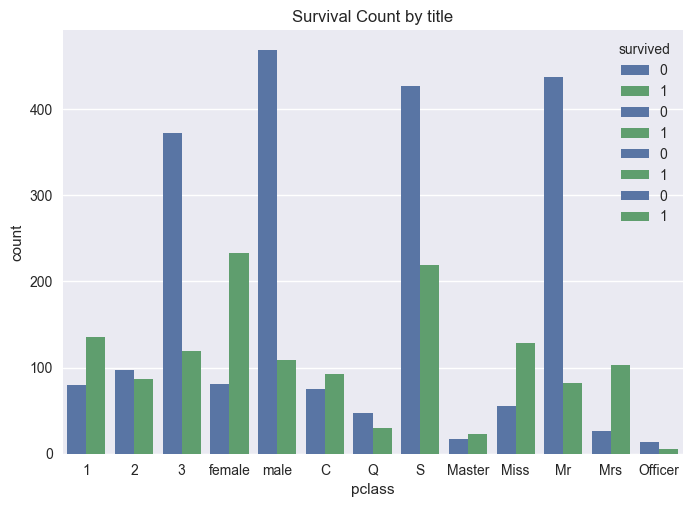

In [7]:
for feat in ["pclass", "sex", "embarked", "title", "ticket"]:
    df[feat] = df[feat].astype("category")
    contingency_table = pd.crosstab(df[feat], df["survived"])
    display(pd.DataFrame(contingency_table))
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi2: {chi2}, p-value: {p}")
    if feat != "ticket":
        sns.countplot(data=df, x=feat, hue="survived")
        plt.title(f"Survival Count by {feat}")
plt.show()

In [8]:
X = df[["sex", "age", "fare", "pclass", "sibsp", "parch", "embarked", "title"]]
y = df["survived"]

print("X: ", X.shape)
print("y: ", y.shape)

X:  (891, 8)
y:  (891,)


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [10]:
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
print(numerical_cols)  # ['age', 'fare', 'sibsp', 'parch']
categorical_cols = X.select_dtypes("category").columns
print(categorical_cols)  # ['sex', 'pclass', 'embarked', 'title']

Index(['age', 'fare', 'sibsp', 'parch'], dtype='object')
Index(['sex', 'pclass', 'embarked', 'title'], dtype='object')


In [11]:
categorical_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore")),
    ]
)
numerical_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="mean")),
        (
            "scaler",
            StandardScaler(),
        ),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, numerical_cols),
        ("cat", categorical_pipeline, categorical_cols),
    ]
)

# Final pipeline
model_pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        # ("classifier", RandomForestClassifier(random_state=42)),
        ("classifier", LogisticRegression(random_state=42)),
        # ("classifier", DecisionTreeClassifier(random_state=42)),
    ]
)